In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv("../data/ChungCheonDC/CompositeETCdata.csv")
df_DC = pd.read_csv("../data/ChungCheonDC/CompositeDCdata.csv")
df_DCstd = pd.read_csv("../data/ChungCheonDC/CompositeDCstddata.csv")

In [12]:
sys.path.append("../codes/")
from DCdata import readReservoirDC_all
directory = "../data/ChungCheonDC/"
dat_temp,height_temp, ID = readReservoirDC_all(directory+"20151231180000.apr")

In [13]:
# missininds = np.arange(df_DC[electrodeID[elecind]].values.size)[np.isnan(df_DC[electrodeID[elecind]].values)]
electrodeID = df_DC.keys()[1:-1]

In [98]:
from scipy import interpolate
locs = dat_temp[:,:4]
mida = locs[:,:2].sum(axis=1)
midb = locs[:,2:].sum(axis=1)
mid = (mida + midb)*0.5
dz = mida-midb
x = np.linspace(mid.min(), mid.max(), 100)
z = np.linspace(dz.min(), dz.max(), 100)
grid_x, grid_z = np.meshgrid(x,z)

def vizDCtimeSeries(idatum, itime, itime_ref, colors, flag):
    fig = plt.figure(figsize = (12, 12))
    ax1 = plt.subplot(411)
    ax2 = plt.subplot(412)
    
    valsratio = df_DC[electrodeID].values[itime,:].flatten() / df_DC[electrodeID].values[itime_ref,:].flatten()
    valsDC = df_DC[electrodeID].values[itime,:].flatten()
    valsDCstd = df_DCstd[electrodeID].values[itime,:].flatten()
    grid_rho_ratio = griddata(mid, dz, valsratio, grid_x, grid_z, interp='linear')
    grid_rho_ratio = grid_rho_ratio.reshape(grid_x.shape)
    if flag =="std":
        vmin, vmax = 0, 10
        grid_rho = griddata(mid, dz, valsDCstd, grid_x, grid_z, interp='linear')        
    elif flag =="rho":
        vmin, vmax = 20, 200
        valsDC[valsDC<vmin] = vmin
        valsDC[valsDC>vmax] = vmax        
        grid_rho = griddata(mid, dz, valsDC, grid_x, grid_z, interp='linear')
    grid_rho = grid_rho.reshape(grid_x.shape)
        
    
    dat1 = ax1.contourf(grid_x, grid_z, grid_rho, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")    
    vmin, vmax = 0.8, 1.2
    grid_rho_ratio[grid_rho_ratio<vmin] = vmin
    grid_rho_ratio[grid_rho_ratio>vmax] = vmax
    dat2 = ax2.contourf(grid_x, grid_z, grid_rho_ratio, 200, vmin =vmin, vmax = vmax, clim=(vmin, vmax), cmap="jet")        
    ax1.scatter(mid, dz, s=20, c = valsDC, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax1.plot(mid, dz, 'k.')
    ax2.scatter(mid, dz, s=20, c = valsratio, edgecolor="None", vmin =vmin, vmax = vmax, clim=(vmin, vmax))
    ax2.plot(mid, dz, 'k.')
    cb1 = plt.colorbar(dat1, ax=ax1)
    cb2 = plt.colorbar(dat2, ax=ax2)    
    
    for i in range(len(colors)):
        ax1.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        ax2.plot(mid[idatum[i]], dz[idatum[i]], 'o', color=colors[i])    
        

    ax3 = plt.subplot(413)
    ax3_1 = ax3.twinx()
    df.plot(x='date', y='reservoirH', ax=ax3_1, color='k', linestyle='-', lw=2)
    df.plot(x='date', y='upperH_med', ax=ax3_1, color='b', linestyle='-', lw=2)
    df.plot(x='date', y='Temp (degree)', ax=ax3, color='r', linestyle='-', lw=2)
    df.plot(x='date', y='Rainfall (mm)', ax=ax3, color='b', linestyle='-', marker="o", ms=4)
    ax3.legend(loc=3, bbox_to_anchor=(1.05, 0.7), fontsize = 14)
    ax3_1.legend(loc=3, bbox_to_anchor=(1.05, 0.3), fontsize = 14)
    itime_ref0 = itime_ref
    itime_ref1 = itime
    ax3.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 40], 'k-', lw=3)
    ax3.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 40], 'k--', lw=3)

    ax4 = plt.subplot(414)
    df_DC.plot(x='date', y=electrodeID[idatum], ax=ax4)
    ax4.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
    ax4.set_yscale('log')
    temp = df_DC[electrodeID[elecind]].values
    vmax = np.median(temp[~np.isnan(temp)]) + np.std(temp[~np.isnan(temp)])*3
    vmin = np.median(temp[~np.isnan(temp)]) - np.std(temp[~np.isnan(temp)])*3
    ax4.plot(np.r_[itime_ref1, itime_ref1], np.r_[vmin, vmax], 'k--', lw=3)
    ax4.plot(np.r_[itime_ref0, itime_ref0], np.r_[vmin, vmax], 'k-', lw=3)
    ax1.text(0., -2, df['date'].values[itime])
#     ax2.text(0., -2, df['date'].values[itime_ref])

    ax4.set_ylim(vmin, vmax)
    

2015-09-13


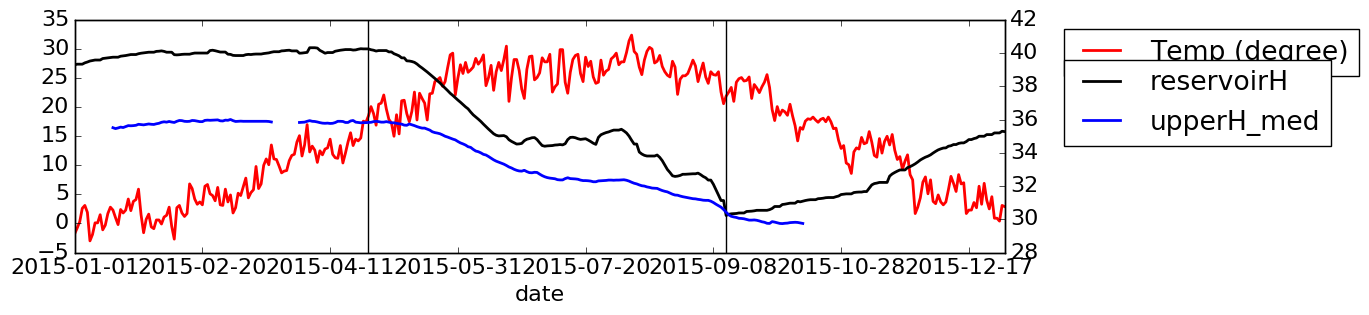

In [99]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
itime_ref0 = 255
itime_ref1 = 115
ax1.plot(np.r_[itime_ref0, itime_ref0], np.r_[-5, 35], 'k-')
ax1.plot(np.r_[itime_ref1, itime_ref1], np.r_[-5, 35], 'k-')
print df['date'].values[itime_ref0]

In [100]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

<function __main__.<lambda>>

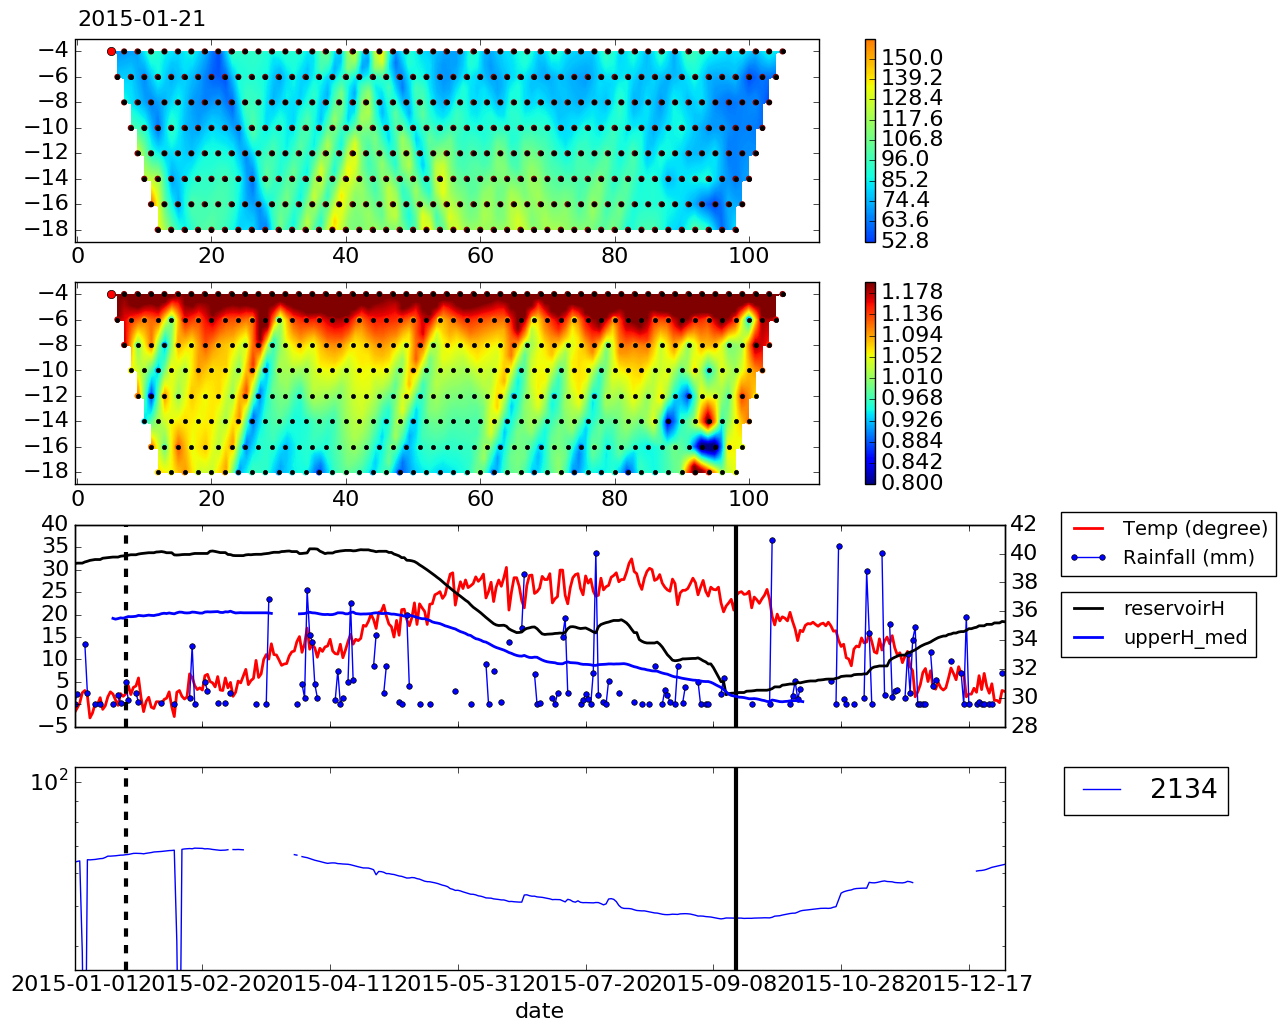

In [101]:
from ipywidgets import interact, IntSlider, ToggleButtons
itime = 93
itime_ref = 259
print df['date'].values[itime]

# vizDCtimeSeries(elecind, itime, itime_ref, ['k','b','r'])
viz = lambda idatum, itime, flag: vizDCtimeSeries([idatum], itime, itime_ref, ['r'], flag)
interact(viz, idatum=IntSlider(min=0, max=379, step=1, value=0)\
         ,itime=IntSlider(min=0, max=360, step=1, value=20)\
         ,flag=ToggleButtons(options=["rho", "std"]))

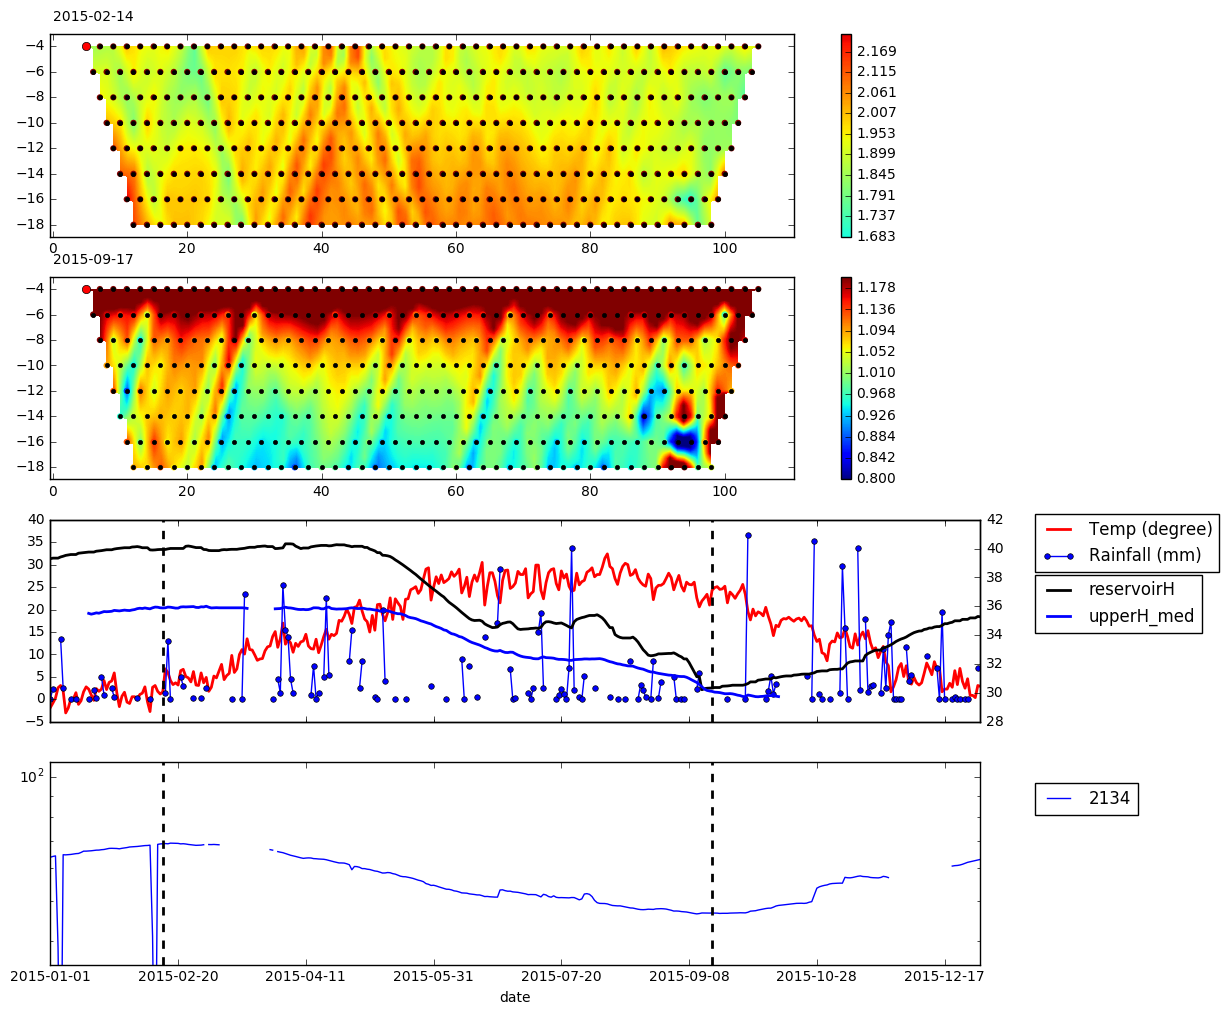

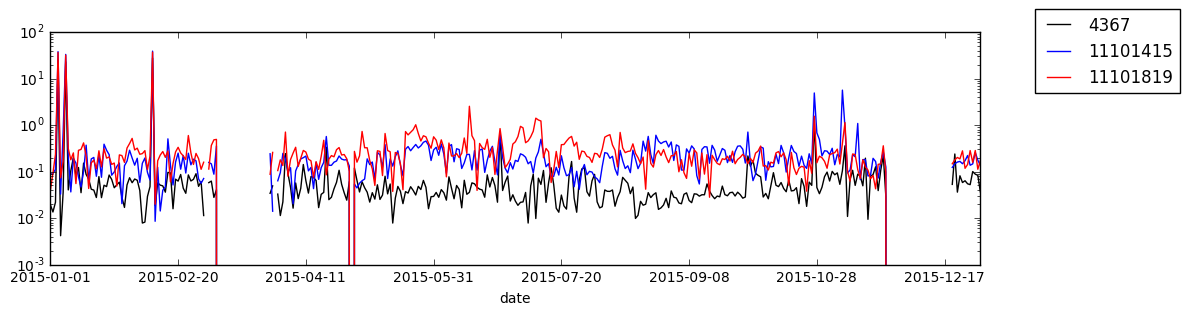

In [33]:
ax1 = plt.subplot(111)
df_DCstd.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k', 'b', 'r'], linestyle="-", lw=1)
ax1.set_yscale('log')
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))

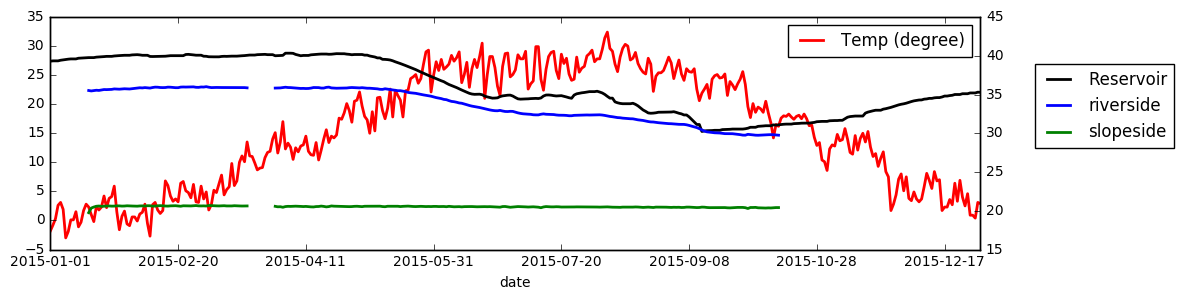

In [60]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='upperH_med', ax=ax1_1, color='b', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='downH_med', ax=ax1_1, color='g', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='Temp (degree)', ax=ax1, color='r', linestyle='-', lw=2)
ax1.legend(loc=1)
ax1_1.legend( ("Reservoir", "riverside", "slopeside"), loc=3, bbox_to_anchor=(1.05, 0.4))

In [53]:
df.keys()

Index([u'Unnamed: 0', u'date', u'reservoirH', u'upperH_med', u'downH_med',
       u'Rainfall (mm)', u'Temp (degree)', u'Moisture (percent)'],
      dtype='object')

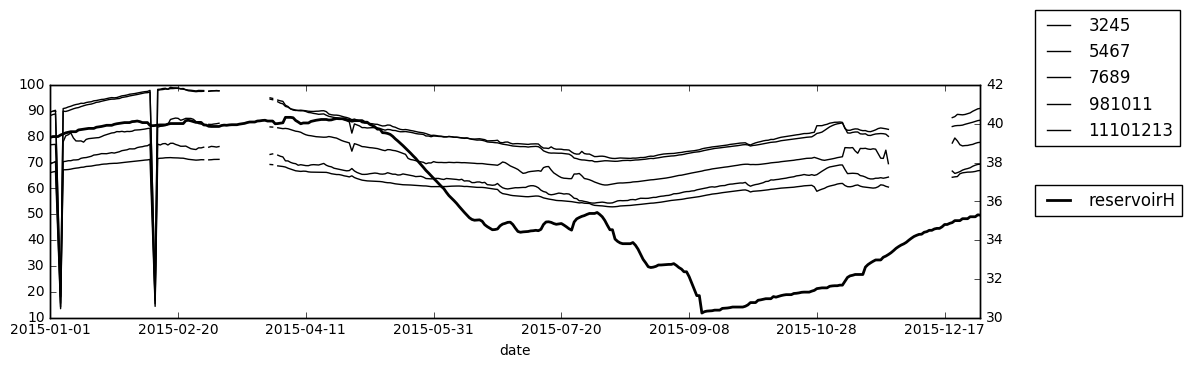

In [48]:
ax1 = plt.subplot(111)
ax1_1 = ax1.twinx()
elecind = range(1, 10, 2)
df_DC.plot(figsize=(12,3), x='date', y=electrodeID[elecind], ax=ax1, colors=['k'])
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
df.plot(figsize=(12,3), x='date', y='reservoirH', ax=ax1_1, color='k', linestyle='-', lw=2)
ax1.legend(loc=3, bbox_to_anchor=(1.05, 0.7))
ax1_1.legend(loc=3, bbox_to_anchor=(1.05, 0.4))
ax1.set_yscale('linear')

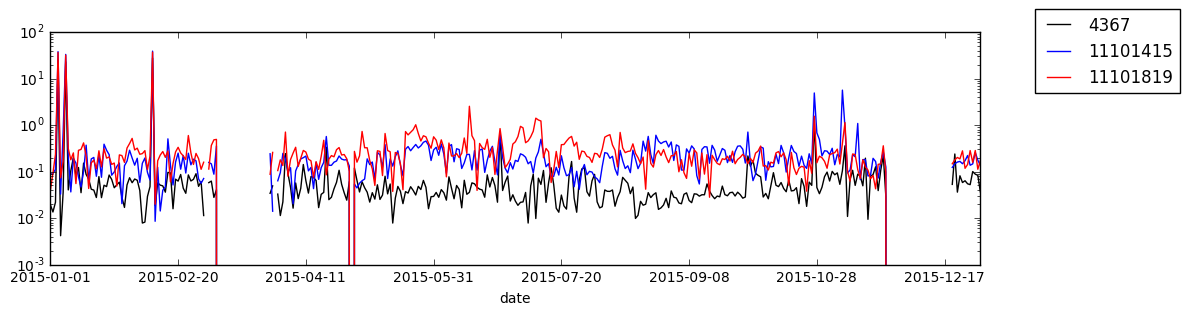